# **Importación de librerias**

In [6]:
pip install colorama

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  colorama  import  Fore
import os

# **Importación del Dataset**

In [7]:
df_raw = pd.read_csv('data/raw/stroke_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/stroke_dataset.csv'

# **Descripción Inicial del Conjunto de Datos y Estructura**

In [ ]:
# Muestra el número de filas y columnas
print(f"\n{Fore.LIGHTCYAN_EX}Número de filas y columnas:\n{Fore.RESET}")
print(df_raw.shape)


Número de filas y columnas:

(4981, 11)


In [ ]:
print(f"\n{Fore.LIGHTCYAN_EX}Informacion del dataset:\n{Fore.RESET}")
df_raw.info()


Informacion del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
print(f"\n{Fore.LIGHTCYAN_EX}Vista de las primeras filas:\n{Fore.RESET}")
df_raw.head()


Vista de las primeras filas:



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
# Muestra el número total de duplicados
print(f"\n{Fore.LIGHTCYAN_EX}Número total de duplicados:\n{Fore.RESET}")
print(df_raw.duplicated().sum())


Número total de duplicados:

0


In [ ]:
# Información estadística inicial
print(f"\n{Fore.LIGHTCYAN_EX}Información estadística inicial:\n{Fore.RESET}")
df_raw.describe()


Información estadística inicial:



,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


## Análisis de variables categóricas

##¿Qué hace este código?
***Analiza las columnas categóricas (de tipo object):***

*   Muestra cuántas categorías únicas hay en cada columna.
*   Calcula la moda de cada columna categórica.
*   Muestra la frecuencia de cada categoría.
*   Identifica valores extraños (categorías que solo aparecen una vez).


***Analiza las columnas numéricas que podrían ser categóricas (si tienen pocos valores únicos):***

Calcula el promedio y la moda de estas columnas.
Muestra los valores únicos y verifica si pueden tener algún valor extraño.

In [ ]:
# Función para analizar variables categóricas
def analizar_variables_categoricas(df):
    print("Análisis de Variables Categóricas\n")

    # Recorrer todas las columnas categóricas
    for col in df.select_dtypes(include='object').columns:  # Solo para variables categóricas (tipo 'object')
        print(f"Columna: {col}")

        # Contar el número de categorías únicas
        n_categorias = df[col].nunique()
        print(f"Número de categorías: {n_categorias}")

        # Calcular la moda
        moda = df[col].mode()[0]
        print(f"Moda: {moda}")

        # Mostrar categorías y su frecuencia
        print(f"Frecuencia de cada categoría:\n{df[col].value_counts()}\n")

        # Buscar valores extraños o fuera de lo común
        valores_extraños = df[col].value_counts()[df[col].value_counts() == 1]
        if len(valores_extraños) > 0:
            print(f"Valores extraños o inusuales: {valores_extraños}\n")
        else:
            print("No se encontraron valores extraños.\n")

    print("Análisis de Promedios (si alguna columna categórica ha sido convertida a numérica):\n")
    for col in df.select_dtypes(include='number').columns:  # Para columnas numéricas
        if df[col].nunique() < 10:  # Filtrar si tiene pocas categorías
            promedio = df[col].mean()
            moda = df[col].mode()[0]
            print(f"Columna: {col}")
            print(f"Promedio: {promedio}")
            print(f"Moda: {moda}")
            print(f"Valores únicos: {df[col].unique()}\n")
        else:
            print(f"Columna: {col} no parece categórica numérica con pocos valores.\n")

# Llamar a la función para analizar las variables categóricas
analizar_variables_categoricas(df_raw)


Análisis de Variables Categóricas

Columna: gender
Número de categorías: 2
Moda: Female
Frecuencia de cada categoría:
gender
Female    2907
Male      2074
Name: count, dtype: int64

No se encontraron valores extraños.

Columna: ever_married
Número de categorías: 2
Moda: Yes
Frecuencia de cada categoría:
ever_married
Yes    3280
No     1701
Name: count, dtype: int64

No se encontraron valores extraños.

Columna: work_type
Número de categorías: 4
Moda: Private
Frecuencia de cada categoría:
work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64

No se encontraron valores extraños.

Columna: Residence_type
Número de categorías: 2
Moda: Urban
Frecuencia de cada categoría:
Residence_type
Urban    2532
Rural    2449
Name: count, dtype: int64

No se encontraron valores extraños.

Columna: smoking_status
Número de categorías: 4
Moda: never smoked
Frecuencia de cada categoría:
smoking_status
never smoked       1838
Unknown     

#Conclusión descripción inicial del dataset:

El dataset tiene 4981 entradas y 11 columnas.
Resumen del análisis inicial:

*   Valores nulos: No hay valores nulos en ninguna columna.
*   Columnas: Hay una combinación de columnas numéricas (edad, hipertensión, nivel de glucosa, IMC) y categóricas (género, estado civil, tipo de trabajo, etc.).

*   ***Estadísticas***:
*   La edad media de los pacientes es de aproximadamente 43 años.
*   El 9.6% de los pacientes tienen hipertensión y el 5.5% sufren de enfermedades cardíacas.
*   El 4.97% de los pacientes han sufrido un ictus.

# **Limpieza de datos**

In [ ]:
#comprobar el nombre de las columnas
print (f"\n{Fore.LIGHTCYAN_EX}Nombre de las columnas{Fore.RESET}")
df_raw.columns


Nombre de las columnas


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#funcion para mostrar gráficos

def save_and_clear_plot(file_name, output_folder="eda_plots"):
    """
    Saves the current plot to a specified folder and then clears the figure.

    Parameters:
    file_name (str): The name of the image file to save (with extension).
    output_folder (str): The folder where the image will be saved (default is "eda_plots").
    """
    # Create the folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Build the full file path
    output_path = os.path.join(output_folder, file_name)

    # Save the current plot to the specified path
    plt.savefig(output_path)

    # Show the plot (optional)
    plt.show()

    # Clear the current figure to avoid overlapping plots
    plt.clf()


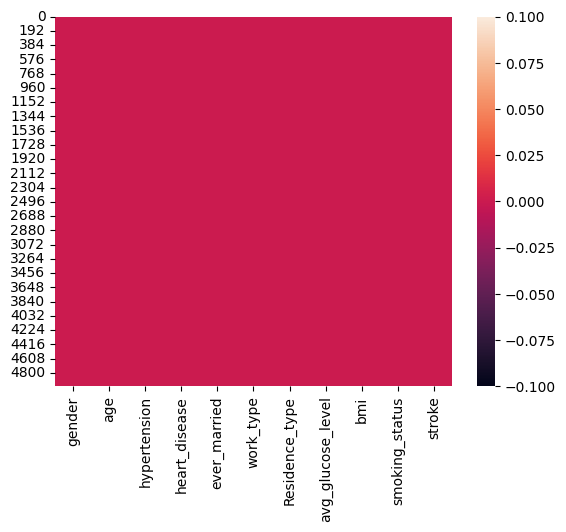

<Figure size 640x480 with 0 Axes>

In [ ]:
#verificar si hay datos nulos
sns.heatmap(df_raw.isnull())

# Guardar el heatmap y limpiar la figura
save_and_clear_plot("heatmap_valores_nulos.png")

### Detección de Outliers Usando el Rango Intercuartílico (IQR)

In [ ]:
# Calcular Q1 (25%) y Q3 (75%)
Q1 = df_raw['avg_glucose_level'].quantile(0.25)
Q3 = df_raw['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_raw[(df_raw['avg_glucose_level'] < lower_bound) |
                       (df_raw['avg_glucose_level'] > upper_bound)]

print (f"\n{Fore.LIGHTCYAN_EX}Número de outliers:\n{Fore.RESET}{outliers.shape[0]}")



Número de outliers:
602


In [ ]:
# Vamos a calcular el porcentaje de outliers
total_filas = 4981
outliers_filas = 602

# Calcular el porcentaje
porcentaje_outliers = (outliers_filas / total_filas) * 100
porcentaje_outliers


12.08592652077896

El hecho de haber identificado 602 outliers en la columna AVG Glucose level es una observación significativa, especialmente considerando el tamaño total del dataset (4981 registros). Esto sugiere que aproximadamente el 12% de los registros tienen valores que se consideran atípicos según el criterio del rango intercuartílico (IQR).

Decidimos mantener los outliers en el análisis ya que representan casos de glucosa extremos, los cuales son críticos para comprender cómo estas situaciones afectan de manera significativa la posibilidad de padecer ictus.
La inclusión de los outliers es esencial para el desarrollo de un modelo predictivo robusto, capaz de capturar no solo las relaciones lineales, sino también los efectos drásticos que los valores de glucosa pueden tener en la posibilidad de padecer ictus. Esto permitirá que el modelo generalice mejor y prediga con mayor precisión.

Algunas columnas contienen valores categóricos que deben ser convertidos en valores numéricos para el análisis cuantitativo, como calcular la correlación.

In [ ]:
# Codificación de variables categóricas utilizando OneHotEncoding

# Revisar las columnas categóricas que necesitan ser codificadas
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Utilizamos pd.get_dummies para aplicar OneHotEncoding a las columnas categóricas
df_encoded_a = pd.get_dummies(df_raw, columns=categorical_columns, drop_first=True)

# Ver los primeros registros del dataset después de la codificación
df_encoded_a.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,True,False,False,True,True,False,False
1,80.0,0,1,105.92,32.5,1,True,True,True,False,False,False,False,True,False
2,49.0,0,0,171.23,34.4,1,False,True,True,False,False,True,False,False,True
3,79.0,1,0,174.12,24.0,1,False,True,False,True,False,False,False,True,False
4,81.0,0,0,186.21,29.0,1,True,True,True,False,False,True,True,False,False


In [ ]:
# Para convertir True/False a 1/0
df_encoded_a = df_encoded_a.astype(int)
df_encoded_a.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,1,1,0,0,1,1,0,0
1,80,0,1,105,32,1,1,1,1,0,0,0,0,1,0
2,49,0,0,171,34,1,0,1,1,0,0,1,0,0,1
3,79,1,0,174,24,1,0,1,0,1,0,0,0,1,0
4,81,0,0,186,29,1,1,1,1,0,0,1,1,0,0


In [ ]:
def encoding_category_data(df_raw):
    # Crear una copia del DataFrame original
    df_encoded_b = df_raw.copy()

    # Codificación de variables categóricas
    df_encoded_b['gender'] = df_encoded_b['gender'].map({'Male': 0, 'Female': 1})
    df_encoded_b['ever_married'] = df_encoded_b['ever_married'].map({'No': 0, 'Yes': 1})
    df_encoded_b['work_type'] = df_encoded_b['work_type'].map({'Govt_job': 0, 'children': 1, 'Self-employed': 2, 'Private': 3})
    df_encoded_b['Residence_type'] = df_encoded_b['Residence_type'].map({'Rural': 0, 'Urban': 1})
    df_encoded_b['smoking_status'] = df_encoded_b['smoking_status'].map({'smokes': 0, 'formerly smoked': 1, 'Unknown': 2, 'never smoked': 3})

    # Llenar los valores que no se pueden mapear
    df_encoded_b.fillna(-1, inplace=True)  # Por ejemplo, usando -1 para valores desconocidos

    return df_encoded_b

# Llamar a la función y mostrar los resultados
df_encoded_b = encoding_category_data(df_raw)
print(df_encoded_b.head())




   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       0  67.0             0              1             1          3   
1       0  80.0             0              1             1          3   
2       1  49.0             0              0             1          3   
3       1  79.0             1              0             1          2   
4       0  81.0             0              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               3       1  
2               1             171.23  34.4               0       1  
3               0             174.12  24.0               3       1  
4               1             186.21  29.0               1       1  


# **Análisis y Visualización de datos**

## **Rangos de edad**

In [ ]:
df_encoded_b['age'].unique()
num_unique_ages = len(df_encoded_b['age'].unique())
print(f"Número de edades únicas: {num_unique_ages}")

Número de edades únicas: 104


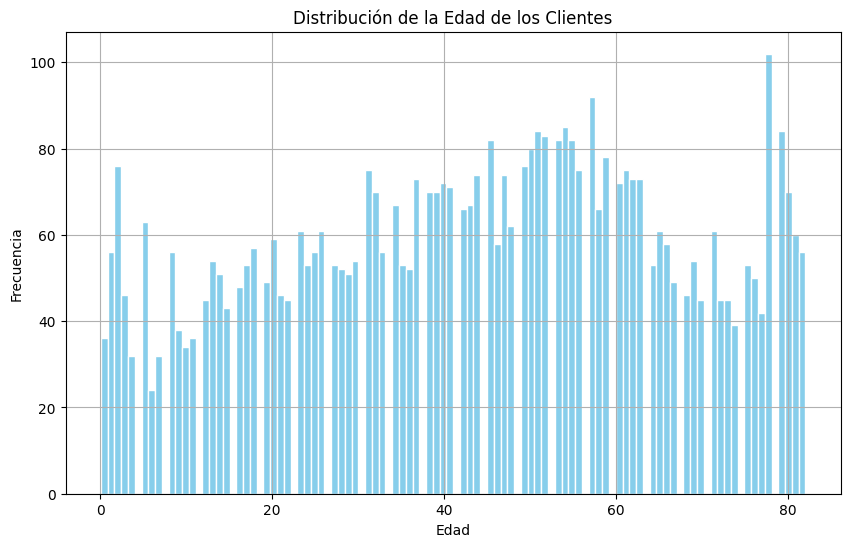

In [ ]:
# Crear un histograma de la columna 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df_encoded_b['age'], bins=num_unique_ages, color='skyblue', edgecolor='white')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)

# Ruta de la carpeta donde quieres guardar la imagen
output_folder = "eda_plots"
# Crear la carpeta si no existe
os.makedirs(output_folder, exist_ok=True)

# Guardar la imagen en la carpeta especificada
output_path = os.path.join(output_folder, "info_Age.png")
plt.savefig(output_path)

plt.show()


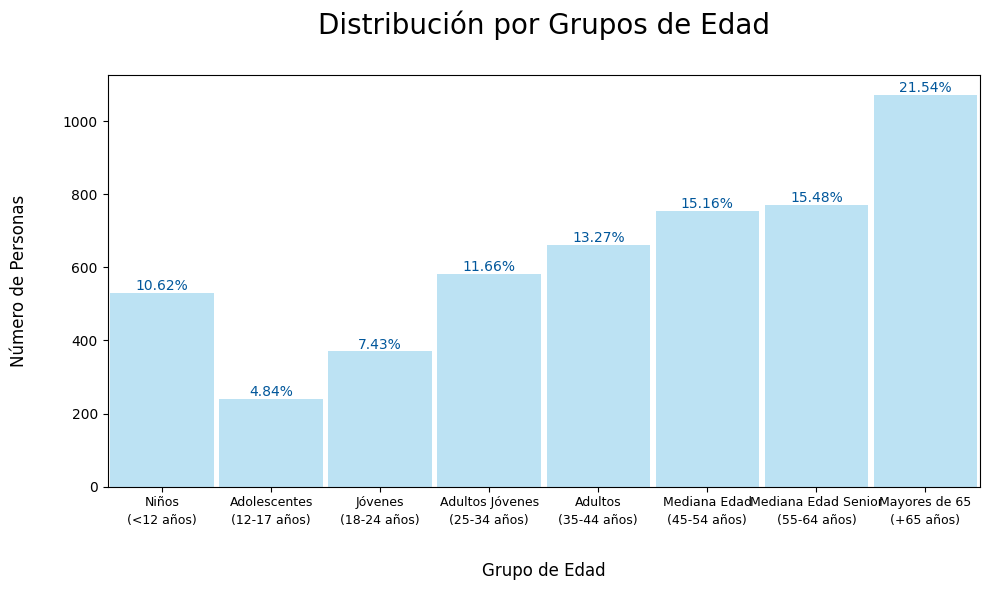

In [ ]:
# Crear una copia del DataFrame para no alterarlo
df_age_groups = df_encoded_b.copy()

# Crear los bins y las etiquetas para los grupos de edad
bins = [0, 12, 17, 24, 34, 44, 54, 64, 100]

labels = [
    'Niños\n(<12 años)',
    'Adolescentes\n(12-17 años)',
    'Jóvenes\n(18-24 años)',
    'Adultos Jóvenes\n(25-34 años)',
    'Adultos\n(35-44 años)',
    'Mediana Edad\n(45-54 años)',
    'Mediana Edad Senior\n(55-64 años)',
    'Mayores de 65\n(+65 años)'
]

# Crear una nueva columna 'Age Group' en el DataFrame
df_age_groups['Age Group'] = pd.cut(df_age_groups['age'], bins=bins, labels=labels, right=False)

# Contar el número de ocurrencias en cada grupo de edad
age_group_counts = df_age_groups['Age Group'].value_counts().sort_index()

# Calcular los porcentajes
age_group_percentages = age_group_counts / age_group_counts.sum() * 100

# Crear un gráfico de barras para visualizar la distribución de los grupos de edad
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, color='#b3e5fc', width=0.95)

# Añadir el porcentaje sobre cada barra con 2 decimales
for i, p in enumerate(ax.patches):
    ax.annotate(f'{age_group_percentages.iloc[i]:.2f}%',  # Usar iloc para acceder por posición
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='#01579b', xytext=(0, 5),
                textcoords='offset points')

# Cambiar el tamaño de las etiquetas del eje X
for item in ax.get_xticklabels():
    item.set_fontsize(9)  # Cambiar el tamaño de la parte principal
    item.set_linespacing(1.5)  # Ajustar el espaciado entre líneas

# Añadir etiquetas y título al gráfico
plt.title('Distribución por Grupos de Edad', fontsize=20, pad=30)
plt.xlabel('Grupo de Edad', fontsize=12, labelpad=25)
plt.ylabel('Número de Personas', fontsize=12, labelpad=25)

# Ajustar el margen superior para separar el título del gráfico
plt.subplots_adjust(top=0.85)

# Mostrar el gráfico
plt.tight_layout()

# Ruta de la carpeta donde quieres guardar la imagen
output_folder = "eda_plots"
# Crear la carpeta si no existe
os.makedirs(output_folder, exist_ok=True)

# Guardar la imagen en la carpeta especificada
output_path = os.path.join(output_folder, "info_age_group.png")
plt.savefig(output_path)


plt.show()


## **Strokes**

Tasas de Strokes por Grupo de Edad

In [ ]:
# Calcular la tasa de satisfacción para cada grupo de edad
satisfaction_by_age = df_age_groups.groupby('Age Group', observed=False)['stroke'].mean() * 100

# Convertir a DataFrame para facilitar el manejo
satisfaction_by_age = satisfaction_by_age.reset_index()
satisfaction_by_age.columns = ['Grupo de Edad', 'Stroke']

<ipython-input-81-c176208783c3>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks_labels)


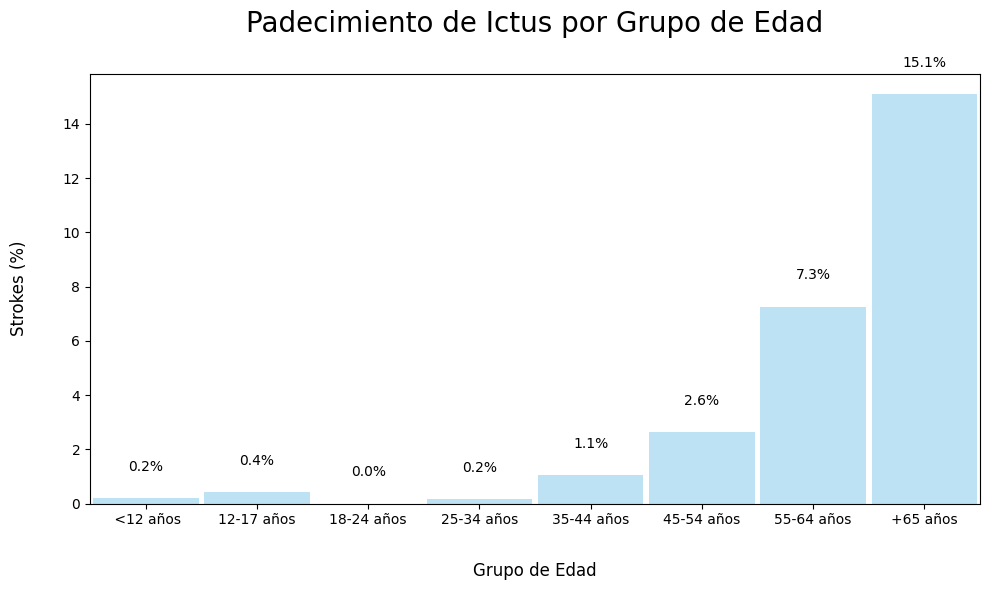

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diccionario de traducción de variables
translation_dict = {
    'Niños\n(<12 años)': ' <12 años',
    'Adolescentes\n(12-17 años)': '12-17 años',
    'Jóvenes\n(18-24 años)': '18-24 años',
    'Adultos Jóvenes\n(25-34 años)': '25-34 años',
    'Adultos\n(35-44 años)': '35-44 años',
    'Mediana Edad\n(45-54 años)': '45-54 años',
    'Mediana Edad Senior\n(55-64 años)': '55-64 años',
    'Mayores de 65\n(+65 años)': '+65 años'
}

# Asegúrate de que 'satisfaction_by_age' tiene los nombres de los grupos de edad
# según las claves del diccionario 'translation_dict'

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Grupo de Edad', y='Stroke', data=satisfaction_by_age, color='#b3e5fc', width=0.95)

# Añadir etiquetas de porcentaje encima de cada barra
for i, row in satisfaction_by_age.iterrows():
    plt.text(i, row['Stroke'] + 1, f"{row['Stroke']:.1f}%", ha='center', fontsize=10)

# Cambiar las etiquetas del eje X usando el diccionario de traducción
xticks_labels = [translation_dict.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()]
ax.set_xticklabels(xticks_labels)

# Cambiar el tamaño de las etiquetas del eje X
for item in ax.get_xticklabels():
    item.set_fontsize(10)  # Cambiar el tamaño de las etiquetas
    item.set_linespacing(1.5)  # Ajustar el espaciado entre líneas

plt.title('Padecimiento de Ictus por Grupo de Edad', fontsize=20, pad=30)
plt.xlabel('Grupo de Edad', fontsize=12, labelpad=25)
plt.ylabel('Strokes (%)', fontsize=12, labelpad=25)

# Ajustar el margen superior para separar el título del gráfico
plt.subplots_adjust(top=0.85)

plt.tight_layout()
plt.show()


## **Cálculo de Correlaciones**

Determinar la correlación entre cada factor y el padecimiento de ictus para cuantificar la fuerza y la dirección de la relación. Esto nos dará una idea aún más clara de cúan relacionadas están las variables.

                     gender       age  hypertension  heart_disease  \
gender             1.000000  0.026538     -0.021485      -0.086476   
age                0.026538  1.000000      0.278120       0.264852   
hypertension      -0.021485  0.278120      1.000000       0.111974   
heart_disease     -0.086476  0.264852      0.111974       1.000000   
ever_married       0.028971  0.677137      0.164534       0.114765   
work_type          0.030686  0.171575      0.028386       0.027648   
Residence_type     0.004301  0.017155     -0.004755       0.002125   
avg_glucose_level -0.055796  0.236763      0.170028       0.166847   
bmi                0.012093  0.373703      0.158762       0.060926   
smoking_status     0.070968 -0.075962     -0.011498      -0.063801   
stroke            -0.008870  0.246478      0.131965       0.134610   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                 0.028971   0.030686        0.004301          -0.055796 

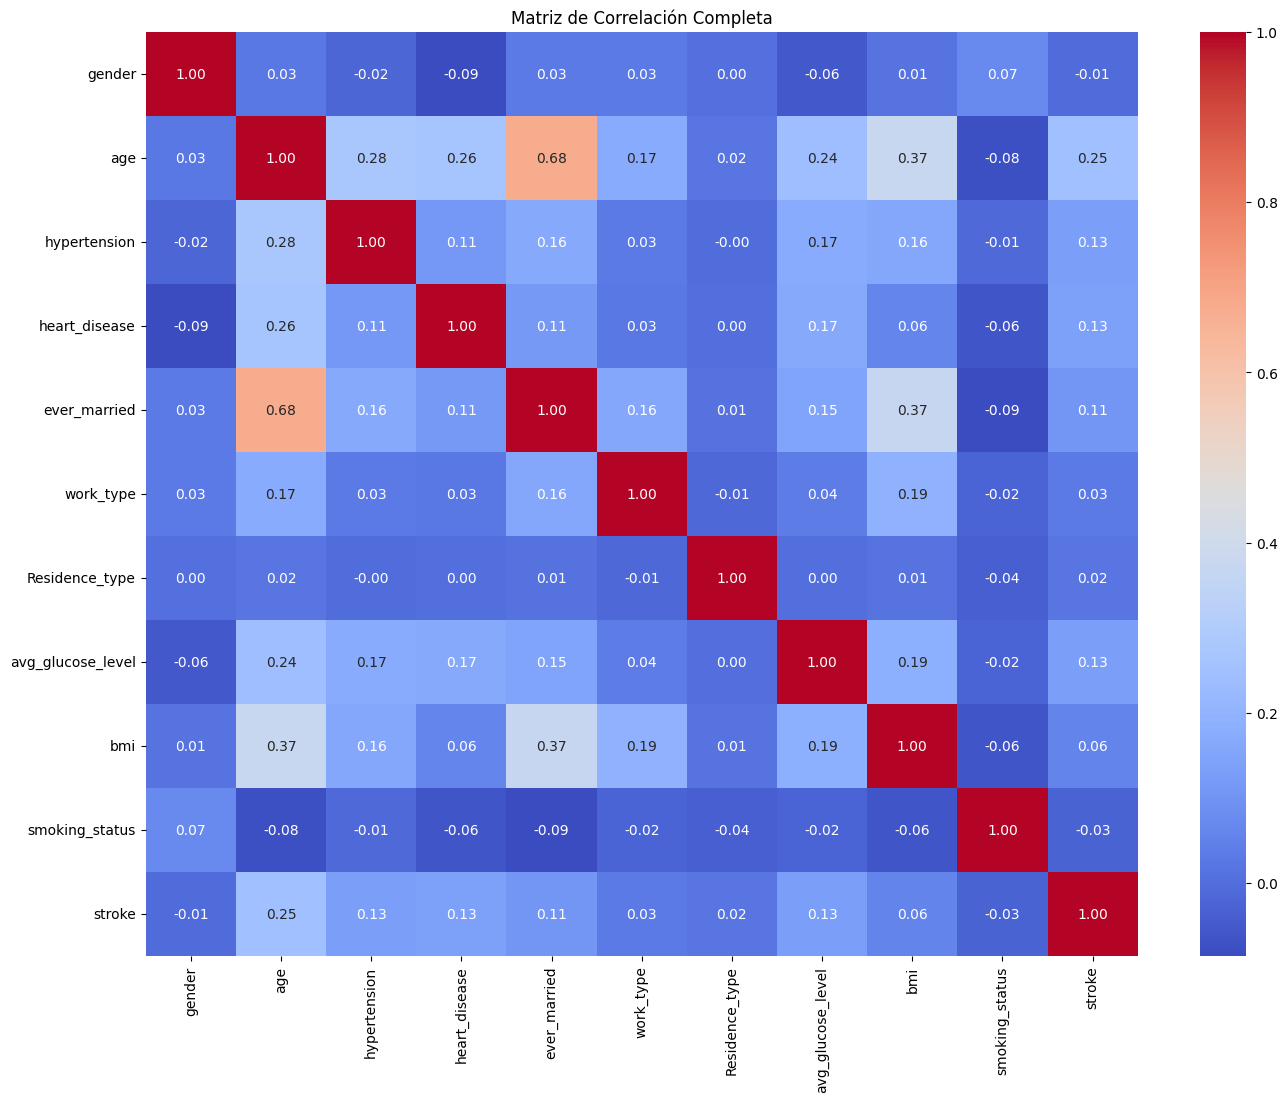

In [ ]:
# Calcula la matriz de correlación para todas las variables
correlation_matrix = df_encoded_b.corr()

# Mostrar la matriz de correlación en forma de tabla
print(correlation_matrix)

# Opcional: Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación Completa')

# Ruta de la carpeta donde quieres guardar la imagen
output_folder = "eda_plots"
# Crear la carpeta si no existe
os.makedirs(output_folder, exist_ok=True)

# Guardar la imagen en la carpeta especificada
output_path = os.path.join(output_folder, "correlation_matrix.png")
plt.savefig(output_path)

plt.show()

***Puntos relevantes**

### Variables con Correlación Fuerte con la Satisfacción:

Las correlaciones calculadas entre cada factor y el padecimiento de ictus (stroke) muestra que los factores que se encuentran más relacionados son: age, hypertension, heart_disease, ever_married y avg_glucose_level.

Age (0.25): Tiene una correlación positiva fuerte, sugiriendo que el género es un factor importante frente a contración de ictus.

Indicadores como hypertensión, enfermedades del corazón y avg_glucose_level estan equiparadamente relacionados con la posibilidad de contraer ictus.

###  Variables con Correlaciones entre Sí:
Age y ever_married (0.68): Muestran una correlación positiva alta.


###  Correlaciones Negativas o Cercanas a Cero:
Tipo de residencia no tiene un impacto significativo en esta temática.



### Conclusiones:
De este análisis surge que los factures críticos para el padecimiento de ictus son la edad, hipertensión, enfermedades cardiovasculares y nivel de glucosa. Siendo no tan significativos el tipo de trabajo o la ubicación.


In [ ]:
df_encoded_b.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [ ]:
# Guardar el DataFrame en un archivo CSV
df_encoded_b.to_csv('stroke_dataset_encoded.csv', index=False)

#Normalización de datos

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df_processed = pd.read_csv('stroke_dataset_encoded.csv')

# Crear el scaler
scaler = StandardScaler()

# Aplicar el scaler a las columnas seleccionadas (excluyendo las columnas que no quieras escalar)
# Aquí escalamos todas las columnas. Asegúrate de excluir la columna objetivo si no deseas escalarla.
df_scaled = scaler.fit_transform(df_processed)

# Convertir el resultado a un DataFrame, manteniendo los nombres de las columnas originales
df_scaled = pd.DataFrame(df_scaled, columns=df_processed.columns)

# Mostrar el DataFrame con las columnas escaladas
print("\nDataFrame con columnas escaladas:")
print(df_scaled)

# Guardar el DataFrame preprocesado en un archivo CSV.
df_scaled.to_csv('stroke_dataset_processed.csv', index=False)



DataFrame con columnas escaladas:
        gender       age  hypertension  heart_disease  ever_married  \
0    -1.183909  1.040584     -0.326186       4.136753      0.720137   
1    -1.183909  1.614270     -0.326186       4.136753      0.720137   
2     0.844660  0.246250     -0.326186      -0.241735      0.720137   
3     0.844660  1.570141      3.065738      -0.241735      0.720137   
4    -1.183909  1.658400     -0.326186      -0.241735      0.720137   
...        ...       ...           ...            ...           ...   
4976 -1.183909 -0.106788     -0.326186      -0.241735     -1.388624   
4977 -1.183909 -0.150917     -0.326186      -0.241735      0.720137   
4978  0.844660  0.069731      3.065738      -0.241735      0.720137   
4979 -1.183909 -0.150917     -0.326186      -0.241735      0.720137   
4980  0.844660  1.614270      3.065738      -0.241735      0.720137   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0      0.750024        0.983473 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')